In [1]:
from __future__ import print_function
__author__= 'fbb'
import os

from scipy.optimize import curve_fit, minimize
    


## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


##and which mean to give it

In [3]:
mymean=100



#Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

#Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

![numpy](numpy_chisq.png)


In [5]:
#the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = 100

## i am making a dictionary to host the distributions.

that is only one possible option. with a dictionary i can easily inspect the distribution i want by its name: it is a very human friendly data structure. Of course i am only using a single distribution, so for me it is overkill, but if i were doing the whole exercise with 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib-1.4.3-py2.7-linux-x86_64.egg/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


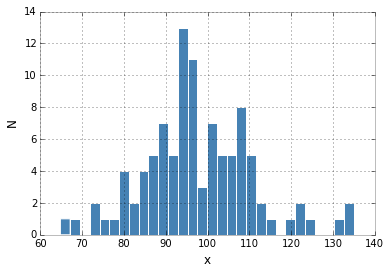

In [10]:
#note: i am adding imports here, to show the workflow: 
#at this point i realize what packages i need and i import them. 
#but it is a good habit to put the includes at the top 
#so the code fails right away if the packages are missing. 
#otherwise a user may have to code running for a long time, and then fail when the package cannot be imported... 
#(unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md={}
#md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
#md now is a dictionary with one object: an array by the key 'chisq'

import pylab as pl
import json
s = json.load( open('fbb_matplotlibrc.json') )
pl.rcParams.update(s)

%pylab inline
pl.hist(md['chisq'],bins=30)
pl.ylabel('N')
pl.xlabel('x')

##lets see what the mean and std of this distributions are

In [11]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 97.40, standard deviation: 13.13


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 1000)

In [12]:
#mysize=1000/(np.array(range(1,100)))
mysize=1000/(np.array(range(1,100)+[10]))
#mysize=(np.random.rand(100)*1000).astype(int)
print (mysize, mysize.shape)

[1000  500  333  250  200  166  142  125  111  100   90   83   76   71   66
   62   58   55   52   50   47   45   43   41   40   38   37   35   34   33
   32   31   30   29   28   27   27   26   25   25   24   23   23   22   22
   21   21   20   20   20   19   19   18   18   18   17   17   17   16   16
   16   16   15   15   15   15   14   14   14   14   14   13   13   13   13
   13   12   12   12   12   12   12   12   11   11   11   11   11   11   11
   10   10   10   10   10   10   10   10   10  100] (100,)


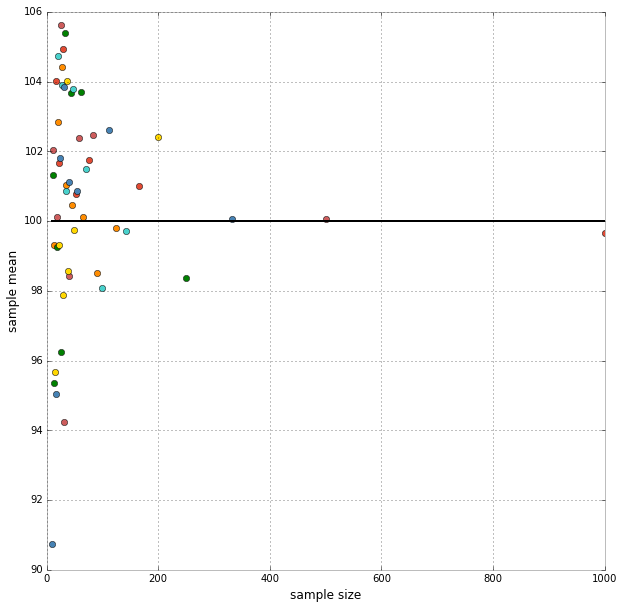

In [13]:
#I am gonna overwrite the disctionary entry created into a nested dictionary (not PEP8...)

md['chisq']={} 

#and do it in a for loop. not pythonic, sigh..

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size=n)
    
means = {}
means['chisq'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['chisq'].iterkeys():
    means['chisq'][nn] = md['chisq'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')
    
    

#now the histogram of the mean of all samples: 
##this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

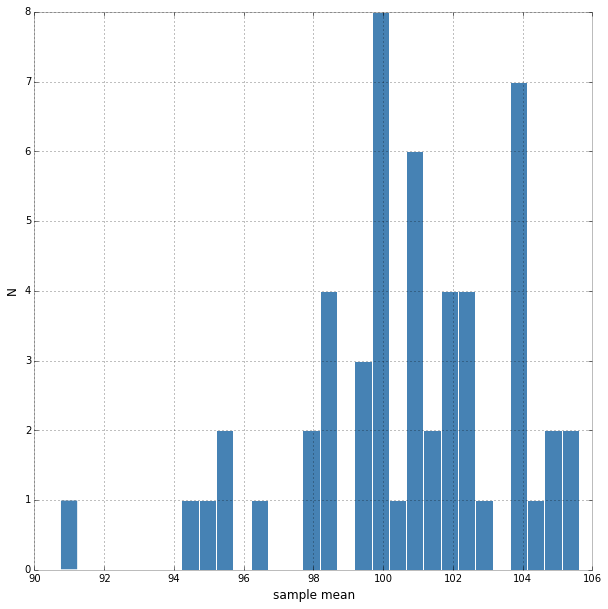

In [14]:
allmeans=[]
for n in means['chisq']:
    allmeans.append(means['chisq'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean')
pl.ylabel('N')

# !!! now you do it for a lot more distributions! 
## make sure you use distribution where the parameters that are passed can be related to the mean. 

